In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv('shipman-confirmed-victims.csv') # import the CSV as a pandas dataframe
df1.drop(columns=['gender2'], inplace=True)
df1.head() # show the first five rows


,DateofDeath,Name,Age,PlaceofDeath,Decision,yearOfDeath,gender,fractionalDeathYear,ageBracket
0,17-Mar-75,Eva Lyons,70,Own home,Unlawful killing,1975,0,1974.71,70-74
1,07-Aug-78,Sarah Hannah Marsland,86,Own home,Unlawful killing,1978,0,1978.10,85-89
2,30-Aug-78,Mary Ellen Jordan,73,Own home,Unlawful killing,1978,0,1978.16,70-74
3,07-Dec-78,Harold Bramwell,73,Own home,Unlawful killing,1978,1,1978.44,70-74
4,20-Dec-78,Annie Campbell,88,Own home,Unlawful killing,1978,0,1978.47,85-89


In [84]:

# check for missing values
missing_values = df1.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/df1.shape[0] # normalize
print(f'{missing_values *100} %')

Series([], dtype: float64) %


In [85]:
from sklearn.preprocessing import LabelEncoder

# convert str values to int using the scikit-learn encoder

st = df1.apply(LabelEncoder().fit_transform)

st.head()

,DateofDeath,Name,Age,PlaceofDeath,Decision,yearOfDeath,gender,fractionalDeathYear,ageBracket
0,109,76,18,2,1,0,0,0,6
1,32,198,34,2,1,1,0,1,9
2,196,159,21,2,1,1,0,2,6
3,33,87,21,2,1,1,1,3,6
4,123,15,36,2,1,1,0,4,9


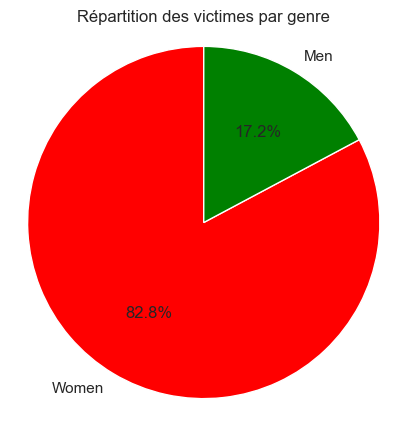

In [104]:
import matplotlib.pyplot as plt


# Comptage du nombre d'hommes et de femmes
victimes = df1['gender'].value_counts()

# Création du graphique en camembert
plt.figure(figsize=(5,5))
victimes.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['red', 'green'])

plt.title('Répartition des victimes par genre')
plt.ylabel('')  # Supprime le label 'gender' qui s'affiche sinon
plt.axis('equal')  # Assure que le camembert est bien circulaire

# Affichage du graphique
plt.show()


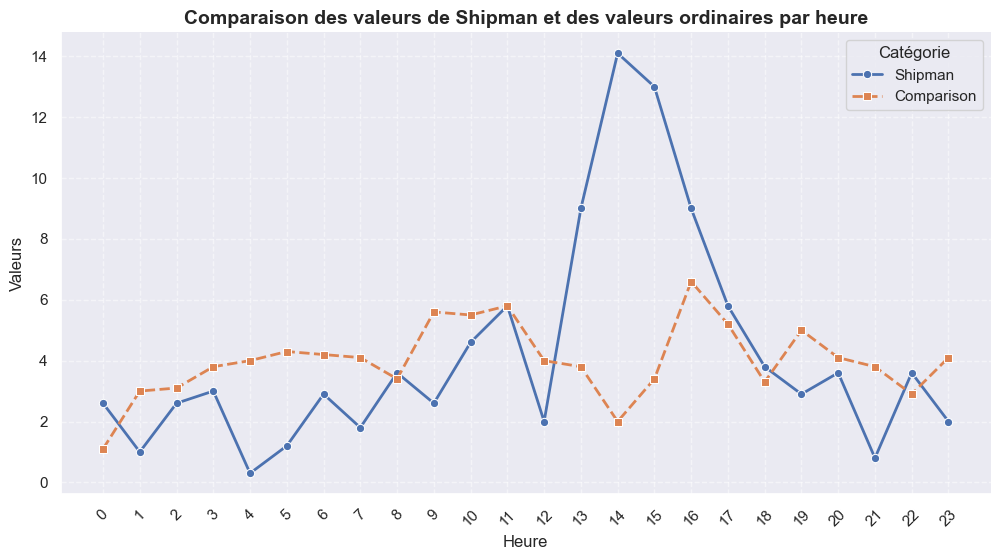

In [105]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Charger les données
df2= pd.read_csv('shipman-times-comparison.csv')

# Création du graphique
plt.figure(figsize=(12, 6))

# Tracer les courbes
sns.lineplot(x="Hour", y="Shipman", data=df2, marker="o", label="Shipman", linewidth=2)
sns.lineplot(x="Hour", y="Comparison", data=df2, marker="s", label="Comparison", linewidth=2, linestyle="dashed")

# Ajouter des labels et un titre
plt.xlabel("Heure", fontsize=12)
plt.ylabel("Valeurs", fontsize=12)
plt.title("Comparaison des valeurs de Shipman et des valeurs ordinaires par heure", fontsize=14, fontweight="bold")
plt.legend(title="Catégorie")

# Afficher toutes les heures sur l'axe X
plt.xticks(df2["Hour"], rotation=45)  # Rotation optionnelle pour éviter le chevauchement

# Amélioration de l'affichage
sns.despine()
plt.grid(True, linestyle="--", alpha=0.5)

# Affichage du graphique
plt.show()

Index(['DateofDeath', 'Name', 'Age', 'PlaceofDeath', 'Decision', 'yearOfDeath',
       'gender', 'fractionalDeathYear', 'ageBracket'],
      dtype='object')


In [4]:
# if 'gender2' in df1.columns:
#     df1.drop(columns=['gender2'], inplace=True)
# # print(df1.head())  # Vérifie les premières lignes

# sns.set(color_codes=True)
# plt.figure(figsize=(14, 12))
# sns.heatmap(st.astype(float).corr(),
#     linewidths=0.2,
#     square=True,
#     linecolor='white',
#     annot=True,
#     cmap="YlGnBu")
# plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Paramètres Seaborn
sns.set(color_codes=True)
plt.figure(figsize=(14, 12))

# Vérification que st est bien défini
if isinstance(st, pd.DataFrame):
    sns.heatmap(st.astype(float).corr(), 
                linewidths=0.2, 
                square=True, 
                linecolor='white', 
                annot=True, 
                cmap="YlGnBu")
else:
    print("Erreur : 'st' n'est pas défini comme DataFrame.")

plt.show()

NameError: name 'st' is not defined

<Figure size 1400x1200 with 0 Axes>

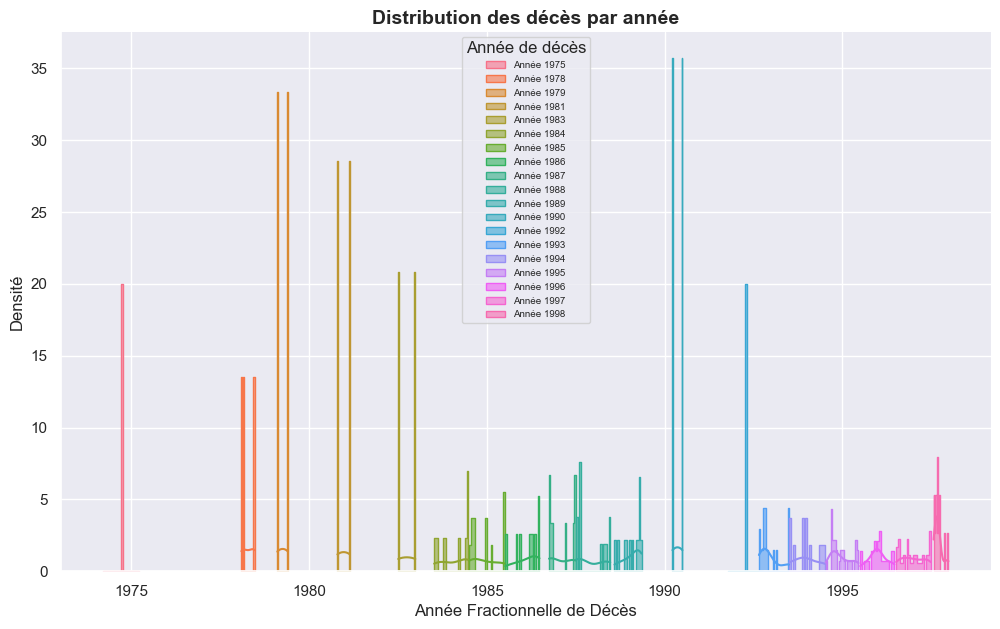

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Charger les données
df = pd.read_csv('shipman-confirmed-victims.csv')

# Création du graphique
plt.figure(figsize=(12, 7))

# Définition d'une palette de couleurs
palette = sns.color_palette("husl", len(df["yearOfDeath"].unique()))

# Boucle sur chaque tranche d'âge
for i, bracket in enumerate(df["yearOfDeath"].unique()):
    subset = df[df["yearOfDeath"] == bracket]
    sns.histplot(subset["fractionalDeathYear"], kde=True, stat="density", label=f"Année {bracket}", 
        element="step", fill=True, bins=20,  # Augmentation du nombre de bins pour plus de détail
        alpha=0.6,  # Ajout de transparence 
        color=palette[i]  # Ajout d'une couleur dynamique
    )

# Ajout des labels et amélioration du titre
plt.xlabel("Année Fractionnelle de Décès", fontsize=12)
plt.ylabel("Densité", fontsize=12)
plt.title("Distribution des décès par année", fontsize=14, fontweight="bold")

# Ajout d'une légende claire
plt.legend(title="Année de décès", loc="upper center", fontsize=8)

# Suppression des bordures pour un design épuré
sns.despine()

# Affichage du graphique
plt.show()

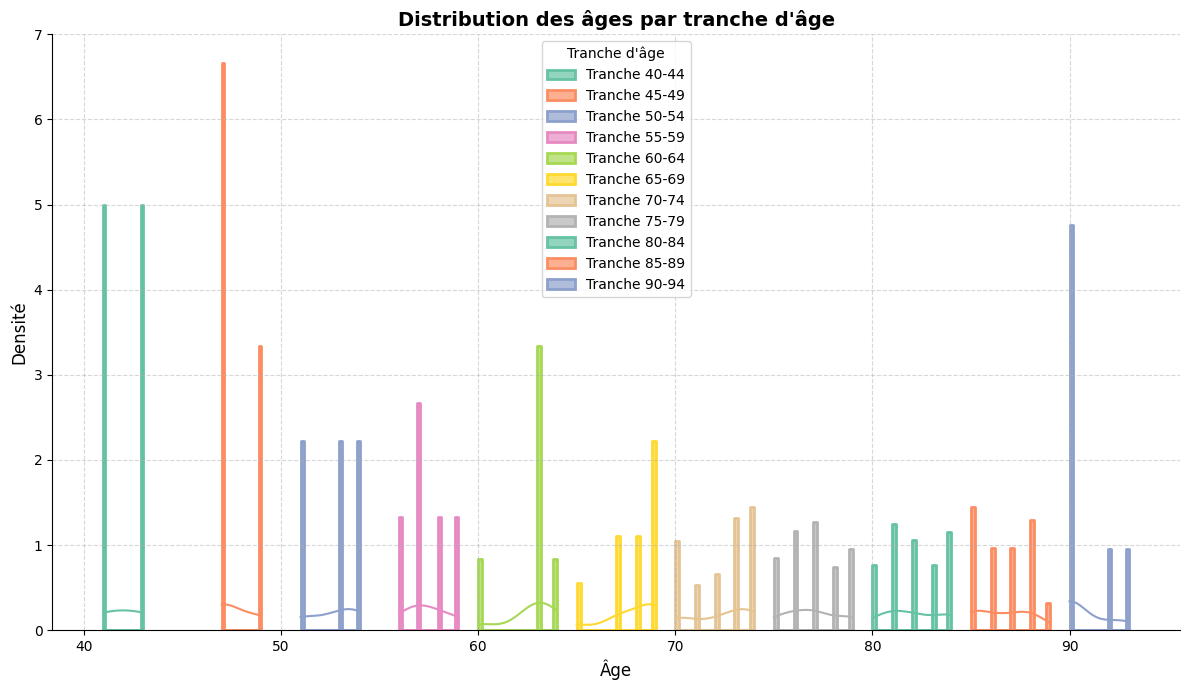

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Charger les données
df = pd.read_csv('shipman-confirmed-victims.csv')

# Création du graphique
plt.figure(figsize=(12, 7))

# Palette de couleurs avec des couleurs distinctes pour chaque tranche d'âge
palette = sns.color_palette("Set2", len(df["ageBracket"].unique()))  # Palette Set2 pour une meilleure distinction

# Boucle sur chaque tranche d'âge
for i, bracket in enumerate(sorted(df["ageBracket"].unique())):
    subset = df[df["ageBracket"] == bracket]
    sns.histplot(
        subset["Age"], 
        kde=True, 
        stat="density", 
        label=f"Tranche {bracket}", 
        element="step", 
        fill=True, 
        bins=20,  # Nombre de bins ajusté pour plus de détails
        alpha=0.7,  # Légère transparence pour éviter la surcharge visuelle
        color=palette[i],  # Couleur distincte pour chaque tranche d'âge
        linewidth=2  # Contour plus visible
    )

# Labels et améliorations visuelles
plt.xlabel("Âge", fontsize=12)
plt.ylabel("Densité", fontsize=12)
plt.title("Distribution des âges par tranche d'âge", fontsize=14, fontweight="bold")

# Amélioration de la légende
plt.legend(title="Tranche d'âge", loc="upper center", fontsize=10)

# Suppression des bordures pour un rendu plus propre
sns.despine()

# Ajout d'une grille légère pour faciliter la lecture
plt.grid(True, linestyle="--", alpha=0.5)

# Amélioration de l'espacement pour éviter les chevauchements
plt.tight_layout()

# Affichage du graphique
plt.show()


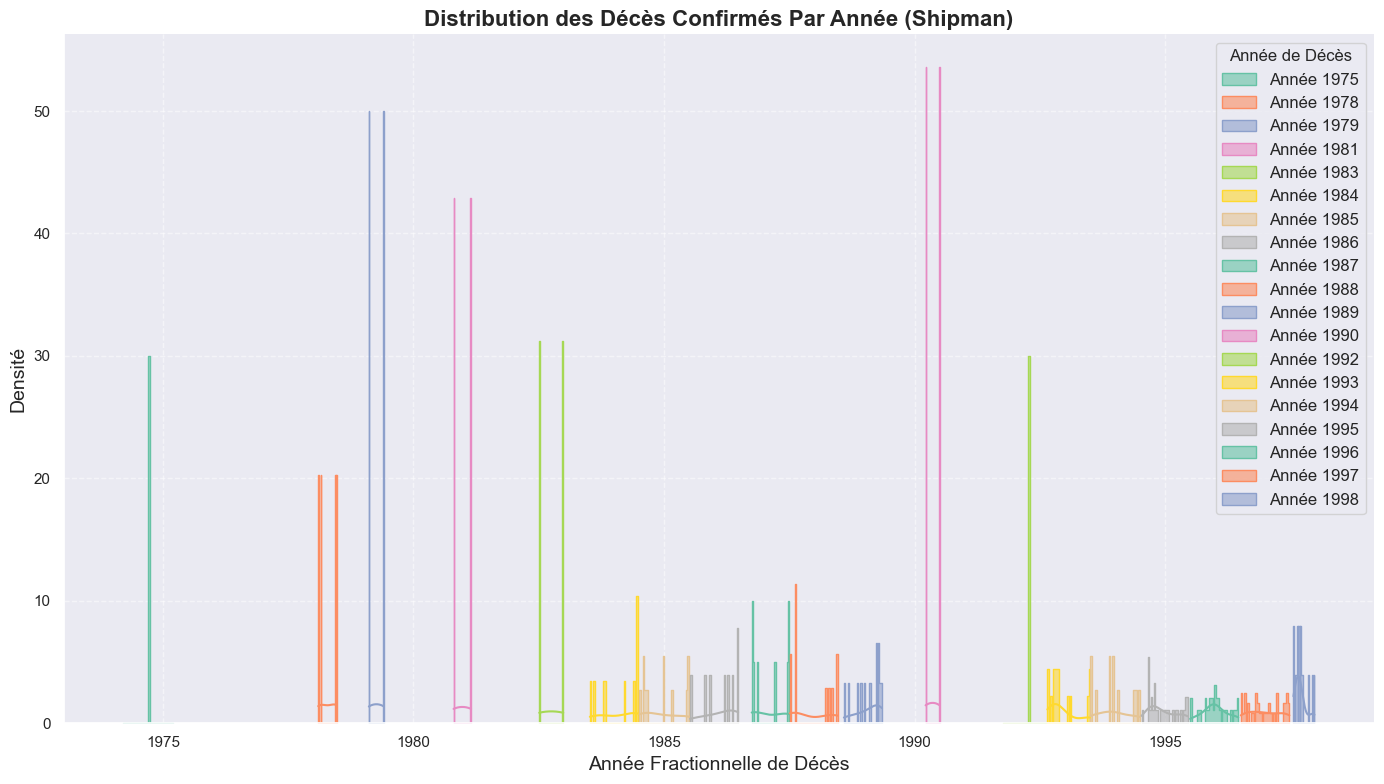

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Charger les données
df1 = pd.read_csv('shipman-confirmed-victims.csv')

# Création du graphique
plt.figure(figsize=(14, 8))  # Taille de figure augmentée pour plus d'espace

# Définition d'une palette de couleurs
palette = sns.color_palette("Set2", len(df1["yearOfDeath"].unique()))  # Palette plus distincte

# Boucle sur chaque tranche d'âge
for i, bracket in enumerate(sorted(df1["yearOfDeath"].unique())):
    subset = df1[df1["yearOfDeath"] == bracket]
    sns.histplot(subset["fractionalDeathYear"], kde=True, stat="density", label=f"Année {bracket}", 
        element="step", fill=True, bins=30,  # Nombre de bins augmenté pour plus de détails
        alpha=0.6,  # Transparence
        color=palette[i]  # Palette dynamique
    )

# Ajout des labels et amélioration du titre
plt.xlabel("Année Fractionnelle de Décès", fontsize=14)
plt.ylabel("Densité", fontsize=14)
plt.title("Distribution des Décès Confirmés Par Année (Shipman)", fontsize=16, fontweight="bold")

# Ajout d'une légende plus claire
plt.legend(title="Année de Décès", loc="upper right", fontsize=12)

# Suppression des bordures pour un design épuré
sns.despine()

# Ajouter une grille légère pour améliorer la lisibilité
plt.grid(True, linestyle='--', alpha=0.5)

# Affichage du graphique
plt.tight_layout()  # Ajuste la disposition pour éviter le chevauchement des éléments
plt.show()


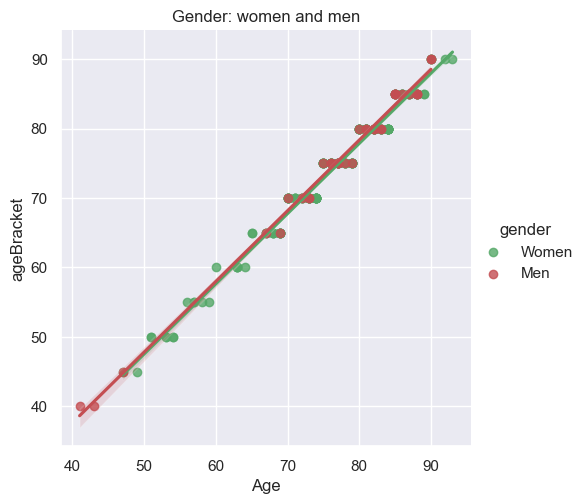

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv('shipman-confirmed-victims.csv')

# Correction des colonnes
df1['gender'] = df1['gender'].replace({0: "Women", 1: "Men"})
df1['ageBracket'] = df1['ageBracket'].str.extract(r'(\d+)').astype(float)

# Tracé avec Seaborn
sns.lmplot(x="Age", y="ageBracket", hue="gender", data=df1, palette={"Men": "r", "Women": "g"}, height=5)

plt.title('Gender: women and men')
plt.show()

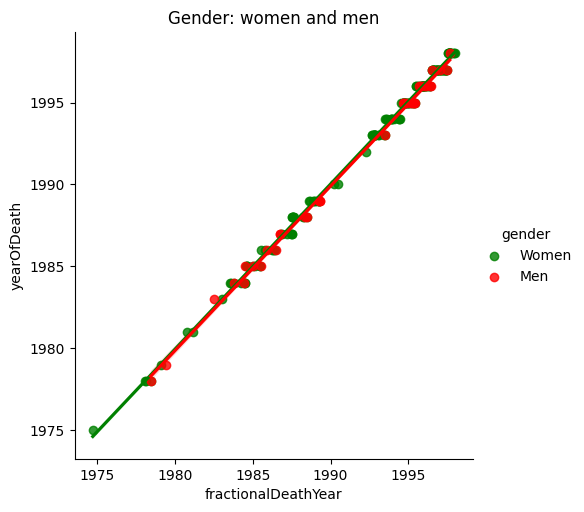

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv('shipman-confirmed-victims.csv')

# Correction des colonnes
df1['gender'] = df1['gender'].replace({0: "Women", 1: "Men"})
df1['yearOfDeath'] = df1['yearOfDeath'].astype(float) 

# Tracé avec Seaborn
sns.lmplot(x="fractionalDeathYear", y="yearOfDeath", hue="gender", data=df1, palette={"Men": "r", "Women": "g"}, height=5)

plt.title('Gender: women and men')
plt.show()

<Figure size 1000x600 with 0 Axes>

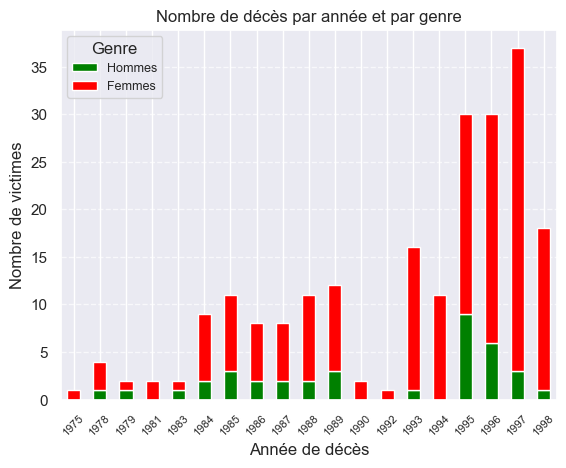

In [101]:
import matplotlib.pyplot as plt
import pandas as pd

# Comptage du nombre de décès par année et par genre
deces_par_an = df1.groupby(['yearOfDeath', 'gender']).size().unstack()

# Création du graphique en barres
plt.figure(figsize=(10, 6))
deces_par_an.plot(kind='bar', stacked=True, color=['green', 'red'])

plt.xlabel('Année de décès')
plt.ylabel('Nombre de victimes')
plt.title('Nombre de décès par année et par genre')
plt.xticks(rotation=45, fontsize=8)

# Amélioration de la légende
plt.legend(title="Genre", labels=["Hommes", "Femmes"], fontsize=9, loc="upper left")

# Ajout d'une grille pour faciliter la lecture
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Affichage du graphique
plt.show()

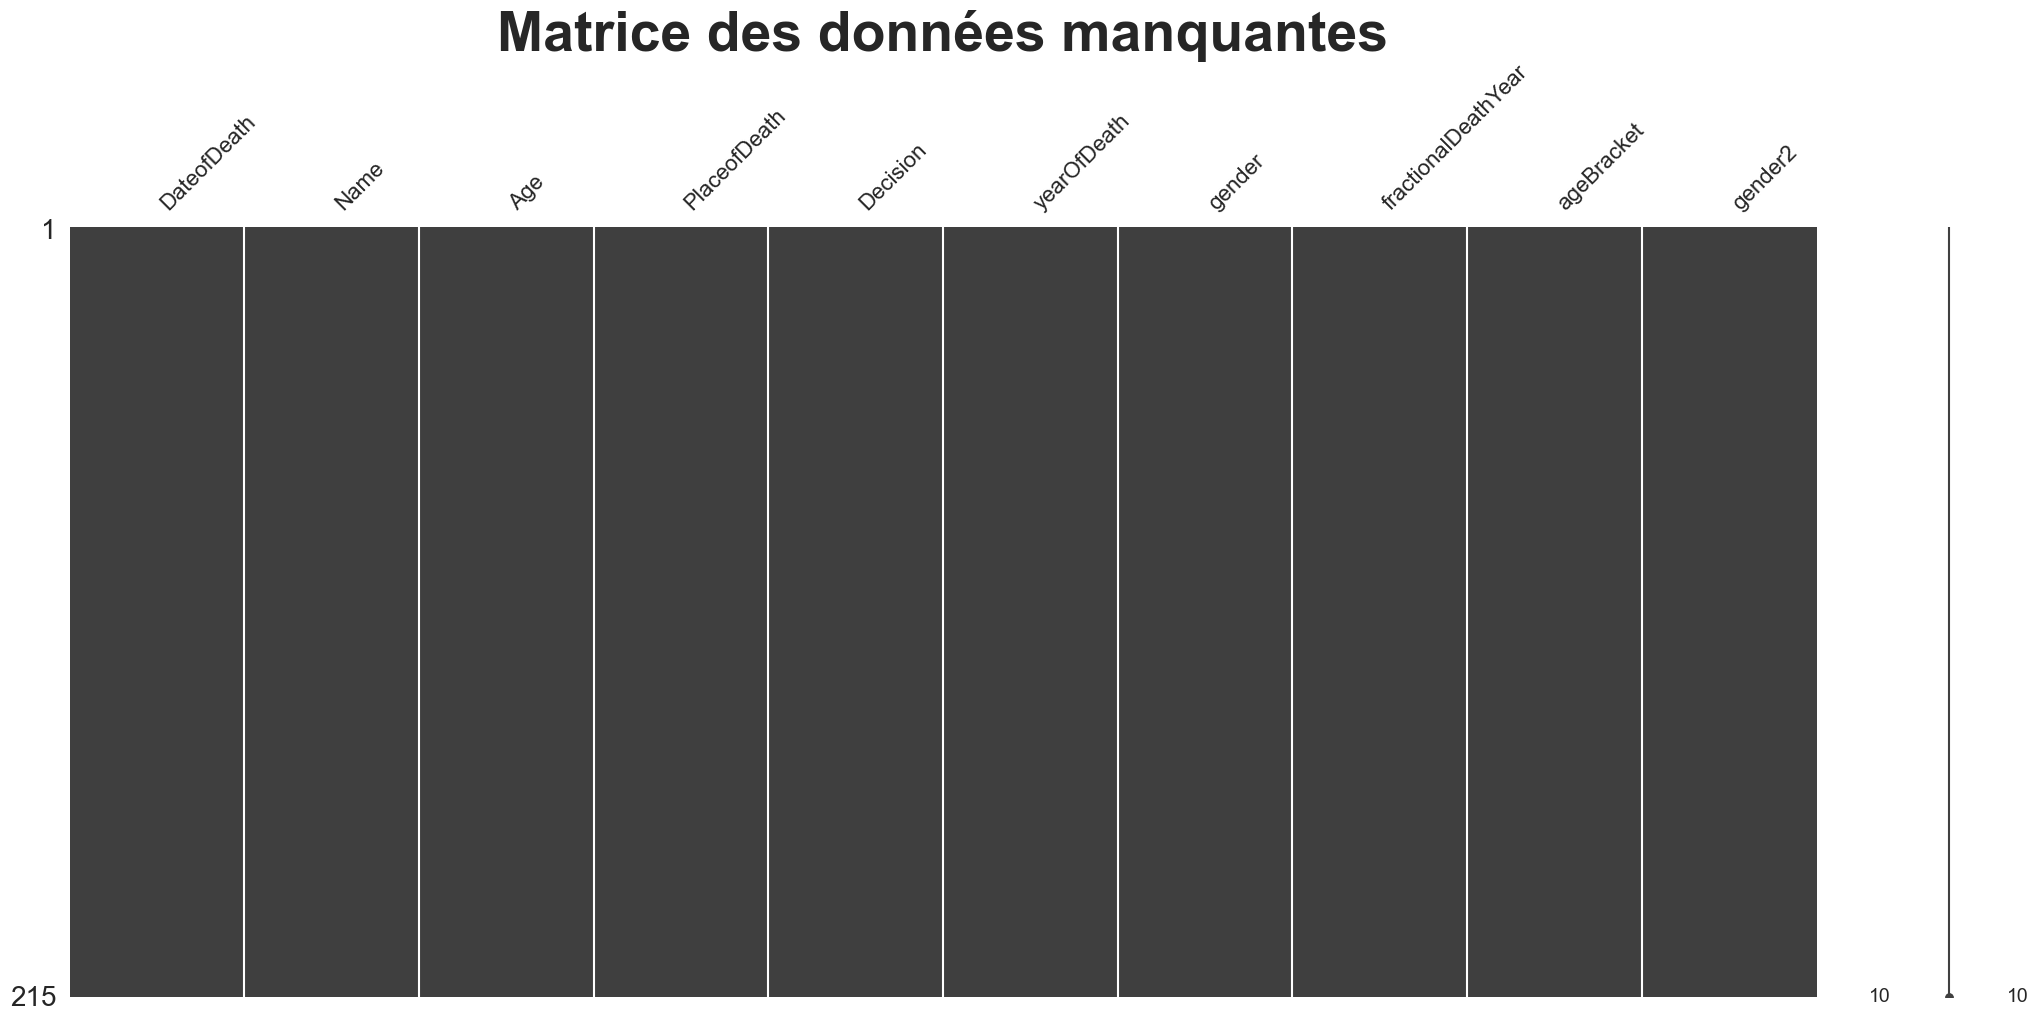

In [112]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df1)
plt.title("Matrice des données manquantes", fontsize=40 , fontweight="bold")

plt.show()

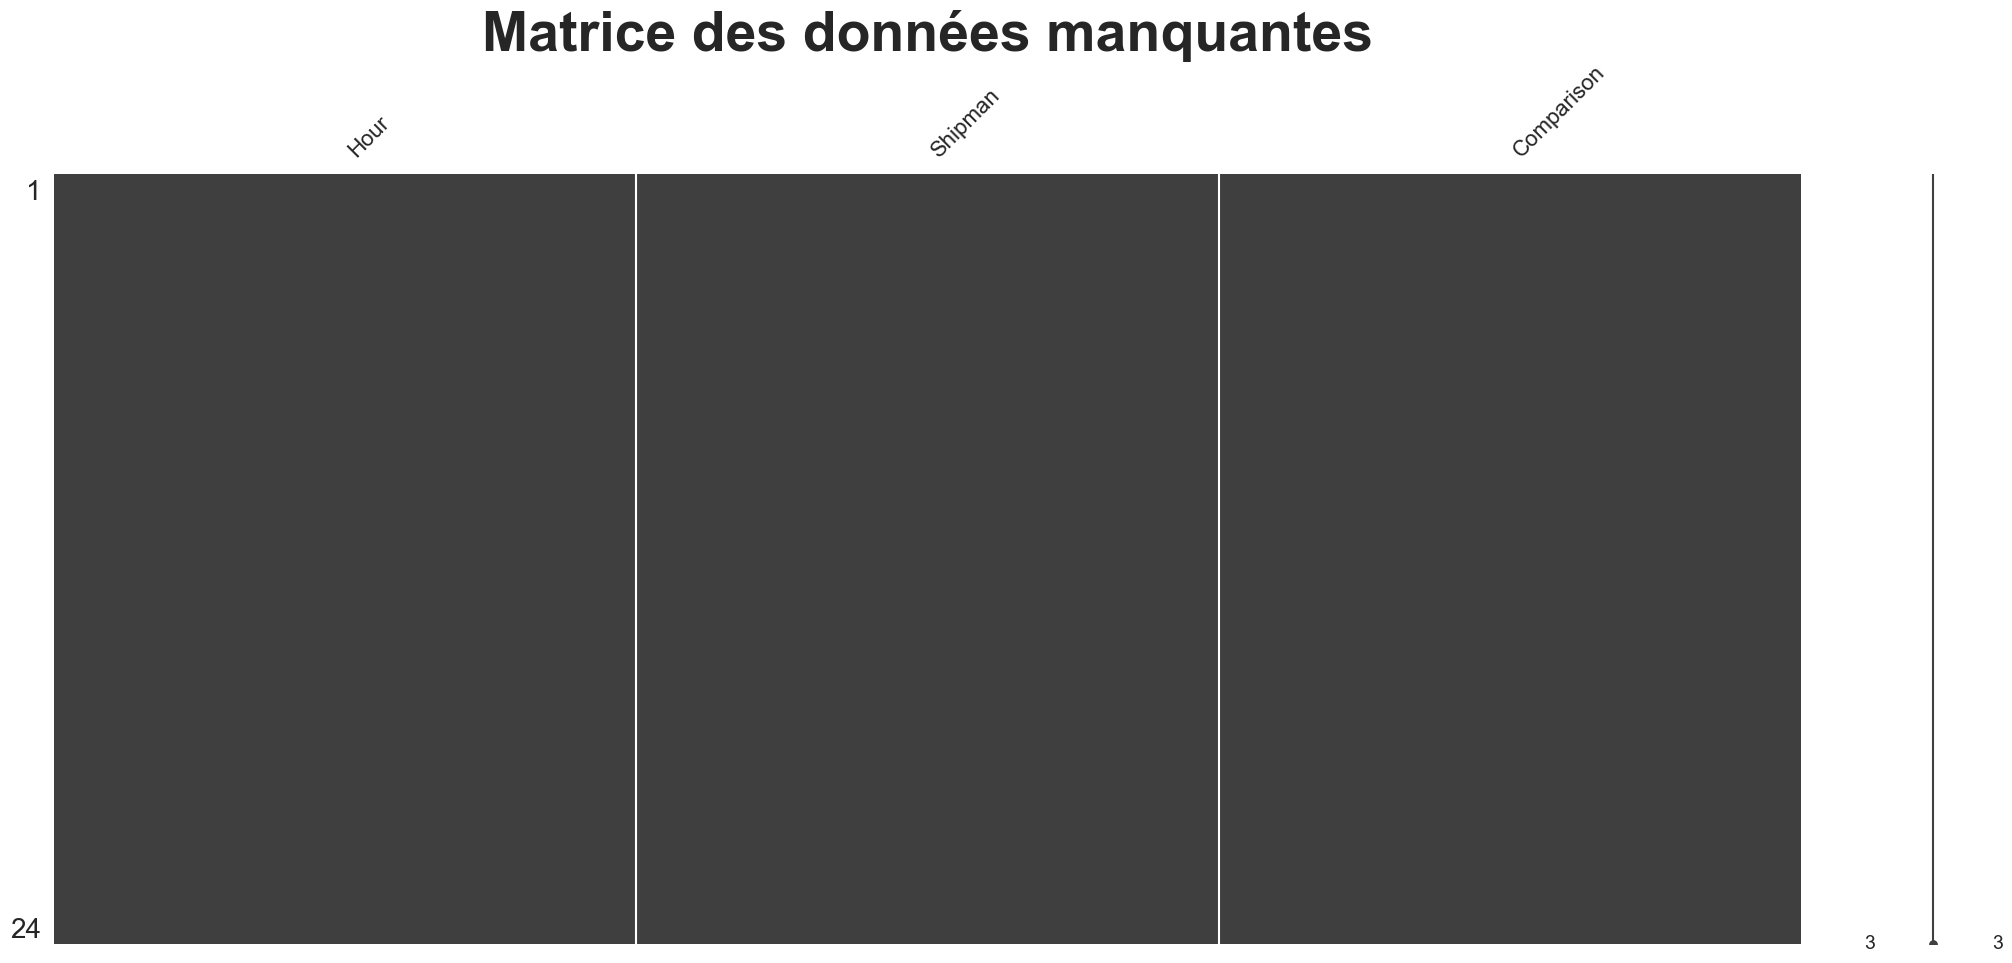

In [113]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df2)
plt.title("Matrice des données manquantes", fontsize=40 , fontweight="bold")

plt.show()